# Library Import

In [1]:
# -*- coding: utf-8 -*-
import pickle
import numpy as np
from scipy.stats import chi2

import sklearn
import matplotlib.pyplot as plt

# Data importation

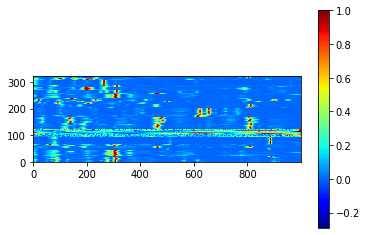

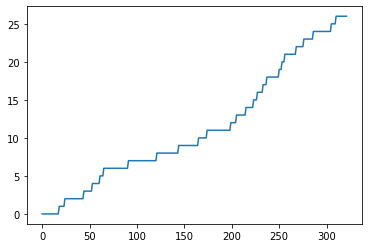

Il y a 322 données réparties sur 27 classes
Shape of X: (322, 1000)


In [2]:
X = np.load('../excellent_unoriented/obs.npy')
y = pickle.load( open( "../excellent_unoriented/labels.pkl", "rb" ) )

plt.imshow(X,cmap='jet')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
plt.plot(y)

plt.show()
print("Il y a "+str(len(y))+" données réparties sur 27 classes")

print("Shape of X: {}".format(X.shape))

# Mixed signal generation

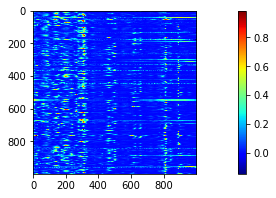

In [3]:
nb_mixed_signals = 1000
nb_class = 27

somme=np.zeros((nb_mixed_signals,X.shape[1]))
y_synthetic = np.zeros((nb_mixed_signals,nb_class))

classe=[]
poids=[]
Ybis=np.zeros((nb_mixed_signals,3,2))
for ii in range(nb_mixed_signals):
    classes=np.random.randint(nb_class,size=[3,])
    #print(classes)
    classe.append(classes)
    Ybis[ii,:,0]=classes
    
    elements=[]
    for i in range(len( classes)):
        e1=y.index(classes[i])
        if classes[i]+1 == nb_class:
            e2=321
        else:
            e2=y.index(classes[i]+1)
    
        elements.append(np.random.choice(np.arange(e1,e2)))
        
    tosomme=np.zeros((len(elements),X.shape[1]))
    rand=np.random.rand(3)
    rand=rand/np.sum(rand)
    poids.append(rand)
    Ybis[ii,:,1]=rand
    
    for i in range(len(elements)):
    
        tosomme[i,:]=X[elements[i],:]*rand[i]
    
    somme[ii,:]=np.sum(tosomme,axis=0)
    
    y_synthetic[ii,classe[ii]]=poids[ii]
    
plt.figure(figsize=(15,3))
plt.imshow(somme,cmap='jet')
plt.colorbar()
plt.show()

In [4]:
from collections import Counter
count=Counter(y)
count

Counter({0: 18,
         1: 6,
         2: 20,
         3: 9,
         4: 8,
         5: 4,
         6: 26,
         7: 30,
         8: 23,
         9: 21,
         10: 9,
         11: 25,
         12: 6,
         13: 10,
         14: 8,
         15: 4,
         16: 6,
         17: 4,
         18: 13,
         19: 3,
         20: 3,
         21: 12,
         22: 8,
         23: 10,
         24: 19,
         25: 5,
         26: 12})

# Saving signals

In [5]:
np.save("signal_synthetic", somme)
np.save("fractions_synthetic", y_synthetic)